<div id="colab_button">
  <h1>Quick tour</h1>
  <a target="_blank" href="https://colab.research.google.com/github/mithril-security/blindllama/blob/qt/docs/docs/getting-started/quick-tour.ipynb"> 
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</div>

## Introduction
________________________________________________________

BlindLlama is a zero-trust API for querying open-source models, which:

1. **Deploys models in a zero-trust hardened environment**. Even our admins cannot access user data- meaning there are technical guarantees we cannot view or use your data (e.g we cannot train models on user data).

2. **Provides robust technical proofs** that users **are communicating with an authentic BlindLlama server deployed within a zero-trust hardened environment**.

<div class="alert"><span class="closebtn" onclick="this.parentElement.style.display='none';">&times;</span>
⚠️ This quick tour uses the <b>alpha</b> version of our API which enables you to test out and learn more about BlindLlama.<br><br>
It does not yet have the full security features.
Do not test our API with confidential information... yet!<br><br>
You can follow our progress towards the next <b>beta</b> and <b>audit-ready</b> versions of BlindLLama on our 
<a href="https://mithril-security.notion.site/BlindLlama-roadmap-d55883a04be446e49e01ee884c203c26">roadmap</a>!
</div>

## Quick tour guide
________________________________________________________

This guide will show you how you can query [Llama2-70b](https://huggingface.co/meta-llama/Llama-2-70b) with BlindLlama.

> Llama2 is is a text-generation LLM (large language model) that can be queried in a similar way to OpenAI's ChatGPT.

### Get your access token

Before you can use our API, you will need to get your personal access token from [Mithril Cloud](https://cloud.mithrilsecurity.io/).

### Installation

Next, you'll need to install the BlindLlama open-source Python client.

In [ ]:
!pip install blind_llama

### Querying the model
Now you're ready to start playing with our privacy-friendly Llama 2 model!

First of all, you'll need to import the `blind_llama` package and then copy and paste your API key into the corresponding `API_KEY` variable in order to be able to use our API.

BlindLlama's client SDK is based on that of `openai` to facilitate uptake for end users are already familiar with their SDK.

Our querying method `completion.create()` accepts three options `model`, `prompt` and `temperature` of which only `prompt` is compulsory.:

- The `prompt` option is a string input containing your query input text. Feel free to modify the `prompt` option below to test the API with new prompts!

- The `model` option allows you to select the model you wish to use and is set to Llama-2-70b by default. We currently only support this model, but will add more models in the near future.

- The `temperature` is the sampling temperature and should be a value between 0 and 1. The higher the value, the more random the output will be. The lower the value, the more deterministic it will be. The `temperature` option is set to 0 by default. This will make the model use log probability to automatically increase the temperature until certain thresholds are hit.

The `completion.create()` method returns the response of the model as a string.

In [10]:
import blind_llama as openai

# set your Mithril Cloud API key
openai.api_key = "YOUR_API_KEY_HERE"

# query model and save output in response string
response = openai.completion.create(
  model="meta-llama/Llama-2-70b-chat-hf", # set model with HuggingFace model ID
  prompt="Describe me the Python programming language",
  temperature=0.7, # set sampling temperature to generate relatively random output
)
print(f"Result:\n{response}") # print out response

Answer: Sure! Python is a high-level, interpreted programming language that is widely used for various purposes such as web development, scientific computing, data analysis, artificial intelligence, and more. It is known for its simplicity, readability, and ease of use, making it a popular choice for beginners and experienced developers alike. Python's syntax is clean and intuitive, and it has a large standard library and a vibrant community of third-party libraries that make it easy to find tools and resources for whatever you want to do with it. Additionally, Python is a versatile language that can be used for a wide range of applications, from small scripts to large-scale enterprise systems.


## Security
________________________________________________________

> ⚠️ Note that we are still developing some of the security features discussed below!

What we showed you may not look different from other AI APIs provider. But a lot is happening under the hood when you connect to the BlindLlama server to make sure your data remains confidential!

When you connect to the BlindLlama server, the client first verifies that:
- We are talking to an authentic BlindLlama server.
- The server has deployed the genuine server and model code in a hardened zero-trust environment

If either of these checks fail, you will see an error and will be unable to connect to the server:

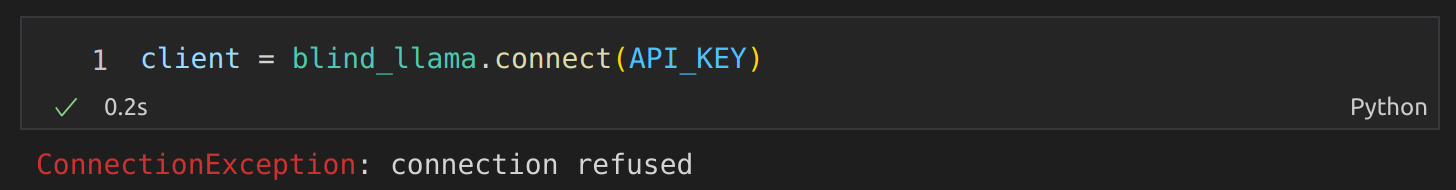

If the connection is successful, we know we are communicating with a hardened environment- meaning not even our admins are not able to access the environment or your data!

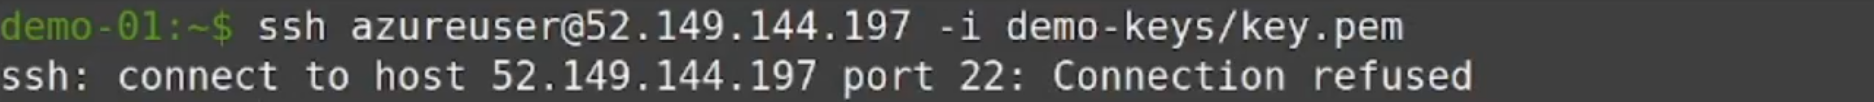

You can check out our overview of how we make our API zero-trust [in the next section](./how-we-protect-your-data.md) and learn more about the underlining key concepts in our [concept guides](../concepts/overview.md).

We also created the BlindLlama whitepaper to cover the security features behind BlindLLama in greater detail. You can read or download the whitepaper [here](https://docsend.com/view/dkepc5fd8njh7i46)!
